<center><font color="#e30b5d"><h1>Question 7</h1></font></center>

In [8]:
import pandas                   as pd
import numpy                    as np
import seaborn                  as sns
import copy                     as copy
import matplotlib.pyplot        as plt

from sklearn.model_selection    import train_test_split
from sklearn.neural_network     import MLPClassifier
from sklearn.metrics            import accuracy_score
from sklearn.metrics            import classification_report
from sklearn.metrics            import confusion_matrix
from sklearn.preprocessing      import Normalizer

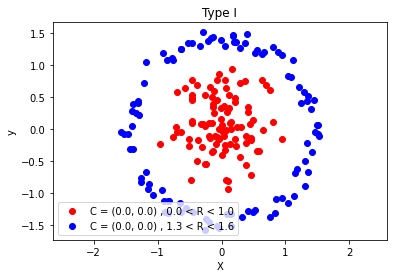

In [3]:
radius1_1   = 0.0
radius1_2   = 1.0
center1_x   = 0.0
center1_y   = 0.0
theta       = np.random.uniform(low = 0       , high = 2*np.pi , size = (100, 1))
radius      = np.random.uniform(low = radius1_1, high = radius1_2, size = (100, 1))
X1          = (center1_x + radius * np.cos(theta)).ravel()
y1          = (center1_y + radius * np.sin(theta)).ravel()
df_1        = pd.DataFrame(np.c_[X1.reshape(-1, 1), y1.reshape(-1, 1)], columns = ['X0', 'X1'])

radius2_1   = 1.3
radius2_2   = 1.6
center2_x   = 0.0
center2_y   = 0.0
theta       = np.random.uniform(low = 0       , high = 2*np.pi , size = (100, 1))
radius      = np.random.uniform(low = radius2_1, high = radius2_2, size = (100, 1))
X2          = (center2_x + radius * np.cos(theta)).ravel()
y2          = (center2_y + radius * np.sin(theta)).ravel()
df_2        = pd.DataFrame(np.c_[X2.reshape(-1, 1), y2.reshape(-1, 1)], columns = ['X0', 'X1'])

plt.scatter(X1, y1, c = 'r', label = f'C = ({center1_x}, {center1_y}) , {radius1_1} < R < {radius1_2}')
plt.scatter(X2, y2, c = 'b', label = f'C = ({center2_x}, {center2_y}) , {radius2_1} < R < {radius2_2}')
plt.title('Type I')
plt.axis('equal')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
df  = pd.concat([df_1, df_2])
df.reset_index(inplace = True)
df  = df.drop(['index'], axis = 1)
t   = pd.DataFrame(np.c_[[-np.ones(100)], [np.ones(100)]].reshape(-1, 1))

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, t, test_size=0.1)

X_train.reset_index(inplace=True)
X_train.drop(['index'], axis=1, inplace=True)
X_train = X_train.to_numpy()

X_test.reset_index(inplace=True)
X_test.drop(['index'], axis=1, inplace=True)
X_test = X_test.to_numpy()

y_train.reset_index(inplace=True)
y_train.drop(['index'], axis=1, inplace=True)
y_train = y_train.to_numpy()

y_test.reset_index(inplace=True)
y_test.drop(['index'], axis=1, inplace=True)
y_test = y_test.to_numpy()

In [6]:
class Madaline():
    def __init__(self, num_l, n_iterations=1000, random_state=42, learning_rate=0.1):
        self.n_iterations   = n_iterations
        self.random_state   = random_state
        self.learning_rate  = learning_rate
        self.weights        = np.random.rand(num_l, 2)
        self.v              = [1] * num_l
        self.b              = np.random.rand(num_l, 1)
        self.b2             = num_l - 1

    def fit(self, X, Y):
        count = 0
        for iter in range(self.n_iterations):
            old_weights = copy.deepcopy(self.weights)
            for x, label in zip(X, Y):
                z_in    = np.array([np.matmul(x, self.weights.T)]).T + self.b
                z       = np.heaviside(z_in, 1) * 2 - 1
                y_in    = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
                y       = np.heaviside(y_in, 1) * 2 - 1
                if y != label:
                    if label == 1:
                        z_j = max(z_in)
                        ind = np.where(z_in == z_j)
                        self.weights[ind, :]    = self.weights[ind, :] + self.learning_rate * (1 - z_in[ind]) * np.array(x)
                        self.b[ind]             = self.b[ind] + self.learning_rate * (1 - z_in[ind])
                    else:
                        ind = [i for i, x in enumerate(z_in) if x > 0]
                        for indice in ind:
                            self.weights[indice, :] = self.weights[indice, :] + self.learning_rate * (-1 - z_in[indice]) * np.array(x)
                            self.b[indice]          = self.b[indice] + self.learning_rate * (-1 - z_in[indice])
            if np.all((self.weights - old_weights) < 0.001) and iter > 10:
                count += 1
                if count > 10:
                    print("Total iterations with", len(self.b), "lines:", iter + 1)
                    break

    def predict(self, X):
        y = []
        for x in X:
            z_in    = np.array([np.matmul(x, self.weights.T)]).T + self.b
            z       = np.heaviside(z_in, 1) * 2 - 1
            y_in    = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
            y.append(np.heaviside(y_in, 1) * 2 - 1)
        return y

Accuracy of prediction is: 0.95


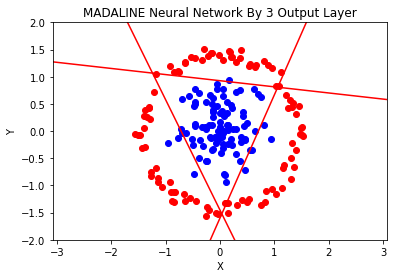

In [10]:
OutLayer    = 3
model       = Madaline(OutLayer)
model.fit(X_train, y_train)
ypred       = model.predict(X_test)
acc         = accuracy_score(ypred, y_test)
print("Accuracy of prediction is:", acc)

for i in range(OutLayer):
    plt.axline((0, float(-model.b[i] / model.weights[i][1])), slope=-model.weights[i][0] / model.weights[i][1], color="r")
plt.scatter(df.loc[t.iloc[:, 0] == +1, 'X0'], df.loc[t.iloc[:, 0] == +1, 'X1'], c = 'r')
plt.scatter(df.loc[t.iloc[:, 0] == -1, 'X0'], df.loc[t.iloc[:, 0] == -1, 'X1'], c = 'b')
plt.title(f'MADALINE Neural Network By {OutLayer} Output Layer')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

Total iterations with 6 lines: 22
Accuracy of prediction is: 1.0


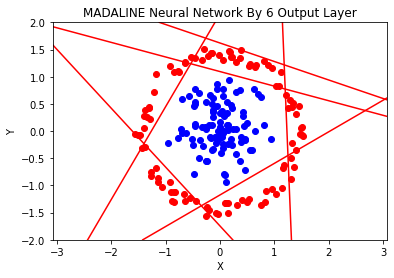

In [11]:
OutLayer    = 6
model       = Madaline(OutLayer)
model.fit(X_train, y_train)
ypred       = model.predict(X_test)
acc         = accuracy_score(ypred, y_test)
print("Accuracy of prediction is:", acc)

for i in range(OutLayer):
    plt.axline((0, float(-model.b[i] / model.weights[i][1])), slope=-model.weights[i][0] / model.weights[i][1], color="r")
plt.scatter(df.loc[t.iloc[:, 0] == +1, 'X0'], df.loc[t.iloc[:, 0] == +1, 'X1'], c = 'r')
plt.scatter(df.loc[t.iloc[:, 0] == -1, 'X0'], df.loc[t.iloc[:, 0] == -1, 'X1'], c = 'b')
plt.title(f'MADALINE Neural Network By {OutLayer} Output Layer')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()